<a href="https://colab.research.google.com/github/AlexAlexeyuk/AlexAlexeyuk/blob/master/SMS_SPAM_HW6_Alexeyuk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None

full_df = pd.read_csv("/content/spam.csv", encoding='latin-1')
df = full_df.iloc[:,:2]
df = df.rename(columns={"v1":"target", "v2":"text"})

In [2]:
df["text"] = df["text"].str.lower()
df.head()

,target,text
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [3]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["text_wo_punct"] = df["text"].apply(lambda text: remove_punctuation(text))
df.head()

,target,text,text_wo_punct
0,ham,"go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...
1,ham,ok lar... joking wif u oni...,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say
4,ham,"nah i don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [4]:
stopwords = "i, me, my, myself, we, our, ours, ourselves, you, you're, you've, \
you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, \
she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, \
themselves, what, which, who, whom, this, that, that'll, these, those, am, is,\
 are, was, were, be, been, being, have, has, had, having, do, does, did, doing,\
  a, an, the, and, but, if, or, because, as, until, while, of, at, by, for,\
   with, about, against, between, into, through, during, before, after, above,\
    below, to, from, up, down, in, out, on, off, over, under, again, further, \
    then, once, here, there, when, where, why, how, all, any, both, each, few,\
     more, most, other, some, such, no, nor, not, only, own, same, so, than, \
     too, very, s, t, can, will, just, don, don't, should, should've, now, d, \
     ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, \
     doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, \
     ma, mightn, mightn't, mustn, mustn't, needn, needn't, shan, shan't,\
      shouldn, shouldn't, wasn, wasn't, weren, weren't, won, won't, wouldn,\
       wouldn't"


In [5]:
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in \
                     stopwords])

df["text_wo_stop"] = df["text_wo_punct"].apply(lambda text:\
                                               remove_stopwords(text))
df.head()

,target,text,text_wo_punct,text_wo_stop
0,ham,"go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,go jurong point crazy available bugis great wo...
1,ham,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say
4,ham,"nah i don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah dont think goes usf lives around though


In [6]:
df.groupby("target").describe()

text         ...                                       text_wo_stop     
       count unique  ...                                                top freq
target               ...                                                        
ham     4825   4515  ...                                   sorry call later   30
spam     747    653  ...  please call customer service representative fr...    4

[2 rows x 12 columns]

In [7]:
df['target'] = df['target'].map( {'spam': 1, 'ham': 0} ).astype(int)
df.head(15)

,target,text,text_wo_punct,text_wo_stop
0,0,"go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,go jurong point crazy available bugis great wo...
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni
2,1,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say
4,0,"nah i don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah dont think goes usf lives around though
5,1,freemsg hey there darling it's been 3 week's n...,freemsg hey there darling its been 3 weeks now...,freemsg darling 3 weeks word back like fun sti...
6,0,even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...,even brother like speak treat like aids patent
7,0,as per your request 'melle melle (oru minnamin...,as per your request melle melle oru minnaminun...,per request melle melle oru minnaminunginte nu...
8,1,winner!! as a valued network customer you have...,winner as a valued network customer you have b...,winner valued network customer selected receiv...
9,1,had your mobile 11 months or more? u r entitle...,had your mobile 11 months or more u r entitled...,mobile 11 months entitled update latest colour...


In [8]:
df['length'] = df['text_wo_stop'].apply(len)

In [9]:
df.head(10)

,target,text,text_wo_punct,text_wo_stop,length
0,0,"go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,go jurong point crazy available bugis great wo...,78
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni,21
2,1,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,135
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say,29
4,0,"nah i don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah dont think goes usf lives around though,43
5,1,freemsg hey there darling it's been 3 week's n...,freemsg hey there darling its been 3 weeks now...,freemsg darling 3 weeks word back like fun sti...,82
6,0,even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...,even brother like speak treat like aids patent,46
7,0,as per your request 'melle melle (oru minnamin...,as per your request melle melle oru minnaminun...,per request melle melle oru minnaminunginte nu...,113
8,1,winner!! as a valued network customer you have...,winner as a valued network customer you have b...,winner valued network customer selected receiv...,122
9,1,had your mobile 11 months or more? u r entitle...,had your mobile 11 months or more u r entitled...,mobile 11 months entitled update latest colour...,102


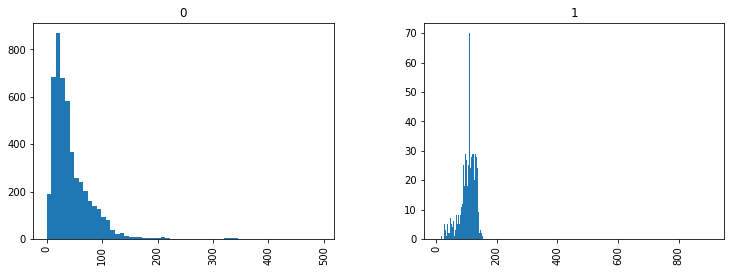

In [10]:
import matplotlib.pyplot as plt

df.hist(column='length',by='target',bins=60,figsize=(12,4));
plt.xlim(-40,950);

In [11]:
df_ham  = df[df['target'] == 0].copy()
df_spam = df[df['target'] == 1].copy()

In [12]:
def show_wordcloud(data_spam_or_ham, title):
    text = ' '.join(data_spam_or_ham['text_wo_stop'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

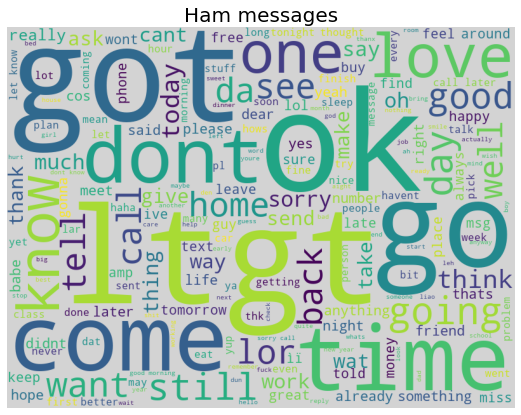

In [13]:
import wordcloud
show_wordcloud(df_ham, "Ham messages")

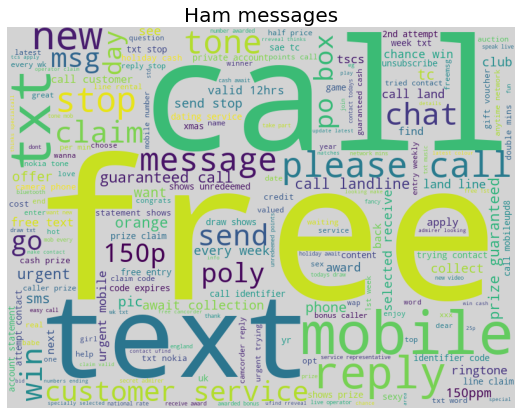

In [14]:
show_wordcloud(df_spam, "Ham messages")

In [15]:
from collections import Counter
cnt = Counter()
for text in df_ham["text_wo_stop"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('2', 305),
 ('get', 303),
 ('ltgt', 276),
 ('ok', 272),
 ('dont', 257),
 ('go', 247),
 ('know', 232),
 ('got', 231),
 ('like', 229),
 ('call', 229)]

In [16]:
cnt_ = Counter()
for text in df_spam["text_wo_stop"].values:
    for word in text.split():
        cnt_[word] += 1
        
cnt_.most_common(10)

[('call', 347),
 ('free', 216),
 ('2', 173),
 ('txt', 150),
 ('mobile', 123),
 ('text', 120),
 ('4', 119),
 ('claim', 113),
 ('stop', 113),
 ('reply', 101)]

In [17]:
from nltk.stem.porter import PorterStemmer

# Drop the two columns 
#df.drop(["text_wo_stopfreq", "text_wo_stopfreqrare"], axis=1, inplace=True) 

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df_ham["text_stemmed"] = df_ham["text_wo_stop"].apply(lambda text: stem_words(text))
df_spam["text_stemmed"] = df_spam["text_wo_stop"].apply(lambda text: stem_words(text))
df_ham.head()

,target,text,text_wo_punct,text_wo_stop,length,text_stemmed
0,0,"go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,go jurong point crazy available bugis great wo...,78,go jurong point crazi avail bugi great world l...
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni,21,ok lar joke wif oni
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say,29,dun say earli hor alreadi say
4,0,"nah i don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah dont think goes usf lives around though,43,nah dont think goe usf live around though
6,0,even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...,even brother like speak treat like aids patent,46,even brother like speak treat like aid patent


In [18]:
df_spam.head()

,target,text,text_wo_punct,text_wo_stop,length,text_stemmed
2,1,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,135,free entri 2 wkli comp win fa cup final tkt 21...
5,1,freemsg hey there darling it's been 3 week's n...,freemsg hey there darling its been 3 weeks now...,freemsg darling 3 weeks word back like fun sti...,82,freemsg darl 3 week word back like fun still t...
8,1,winner!! as a valued network customer you have...,winner as a valued network customer you have b...,winner valued network customer selected receiv...,122,winner valu network custom select receivea å£9...
9,1,had your mobile 11 months or more? u r entitle...,had your mobile 11 months or more u r entitled...,mobile 11 months entitled update latest colour...,102,mobil 11 month entitl updat latest colour mobi...
11,1,"six chances to win cash! from 100 to 20,000 po...",six chances to win cash from 100 to 20000 poun...,six chances win cash 100 20000 pounds txt csh1...,110,six chanc win cash 100 20000 pound txt csh11 s...


In [19]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df_ham["text_lemmatized"] = df_ham["text_wo_stop"].apply(lambda text: lemmatize_words(text))
df_spam["text_lemmatized"] = df_spam["text_wo_stop"].apply(lambda text: lemmatize_words(text))
df_ham.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,target,text,text_wo_punct,text_wo_stop,length,text_stemmed,text_lemmatized
0,0,"go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,go jurong point crazy available bugis great wo...,78,go jurong point crazi avail bugi great world l...,go jurong point crazy available bugis great wo...
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni,21,ok lar joke wif oni,ok lar joking wif oni
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say,29,dun say earli hor alreadi say,dun say early hor already say
4,0,"nah i don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah dont think goes usf lives around though,43,nah dont think goe usf live around though,nah dont think go usf life around though
6,0,even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...,even brother like speak treat like aids patent,46,even brother like speak treat like aid patent,even brother like speak treat like aid patent


In [20]:
df_spam.head()

,target,text,text_wo_punct,text_wo_stop,length,text_stemmed,text_lemmatized
2,1,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,135,free entri 2 wkli comp win fa cup final tkt 21...,free entry 2 wkly comp win fa cup final tkts 2...
5,1,freemsg hey there darling it's been 3 week's n...,freemsg hey there darling its been 3 weeks now...,freemsg darling 3 weeks word back like fun sti...,82,freemsg darl 3 week word back like fun still t...,freemsg darling 3 week word back like fun stil...
8,1,winner!! as a valued network customer you have...,winner as a valued network customer you have b...,winner valued network customer selected receiv...,122,winner valu network custom select receivea å£9...,winner valued network customer selected receiv...
9,1,had your mobile 11 months or more? u r entitle...,had your mobile 11 months or more u r entitled...,mobile 11 months entitled update latest colour...,102,mobil 11 month entitl updat latest colour mobi...,mobile 11 month entitled update latest colour ...
11,1,"six chances to win cash! from 100 to 20,000 po...",six chances to win cash from 100 to 20000 poun...,six chances win cash 100 20000 pounds txt csh1...,110,six chanc win cash 100 20000 pound txt csh11 s...,six chance win cash 100 20000 pound txt csh11 ...


In [21]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df_ham["text_lemmatized"] = df_ham["text_wo_stop"].apply(lambda text: lemmatize_words(text))
df_spam["text_lemmatized"] = df_spam["text_wo_stop"].apply(lambda text: lemmatize_words(text))
df_ham.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,target,text,text_wo_punct,text_wo_stop,length,text_stemmed,text_lemmatized
0,0,"go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,go jurong point crazy available bugis great wo...,78,go jurong point crazi avail bugi great world l...,go jurong point crazy available bugis great wo...
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni,21,ok lar joke wif oni,ok lar joking wif oni
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say,29,dun say earli hor alreadi say,dun say early hor already say
4,0,"nah i don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah dont think goes usf lives around though,43,nah dont think goe usf live around though,nah dont think go usf life around though
6,0,even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...,even brother like speak treat like aids patent,46,even brother like speak treat like aid patent,even brother like speak treat like aid patent


In [22]:
df_spam.head()

,target,text,text_wo_punct,text_wo_stop,length,text_stemmed,text_lemmatized
2,1,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,135,free entri 2 wkli comp win fa cup final tkt 21...,free entry 2 wkly comp win fa cup final tkts 2...
5,1,freemsg hey there darling it's been 3 week's n...,freemsg hey there darling its been 3 weeks now...,freemsg darling 3 weeks word back like fun sti...,82,freemsg darl 3 week word back like fun still t...,freemsg darling 3 week word back like fun stil...
8,1,winner!! as a valued network customer you have...,winner as a valued network customer you have b...,winner valued network customer selected receiv...,122,winner valu network custom select receivea å£9...,winner value network customer select receivea ...
9,1,had your mobile 11 months or more? u r entitle...,had your mobile 11 months or more u r entitled...,mobile 11 months entitled update latest colour...,102,mobil 11 month entitl updat latest colour mobi...,mobile 11 month entitle update late colour mob...
11,1,"six chances to win cash! from 100 to 20,000 po...",six chances to win cash from 100 to 20000 poun...,six chances win cash 100 20000 pounds txt csh1...,110,six chanc win cash 100 20000 pound txt csh11 s...,six chance win cash 100 20000 pound txt csh11 ...


In [24]:
#!pip install h2o
import h2o
h2o.init()

     |████████████████████████████████| 129.4MB 98kB/s 
  Created wheel for h2o: filename=h2o-3.30.1.3-py2.py3-none-any.whl size=129446676 sha256=8a2b58b3566d432fe77d2754f2ab619e6fb1f989f0e0ecc45f9c9eed2041a2f6
  Stored in directory: /root/.cache/pip/wheels/3d/e6/07/53ce9be9cb61b33a79cb3ed1fc39f2dae84f6ee6fe1e373e5e
Successfully built h2o
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.9" 2020-10-20; OpenJDK Runtime Environment (build 11.0.9+11-Ubuntu-0ubuntu1.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.9+11-Ubuntu-0ubuntu1.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpz4kpd4or
  JVM stdout: /tmp/tmpz4kpd4or/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpz4kpd4or/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connectin

H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,1 month and 13 days
H2O_cluster_name:,H2O_from_python_unknownUser_evx7fc
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [25]:
from h2o.estimators.word2vec import H2OWord2vecEstimator
from h2o.estimators import H2OKMeansEstimator

In [26]:
def tokenize(sentences, stop_word = stopwords):
    tokenized = sentences.tokenize("\\W+")
    tokenized_lower = tokenized.tolower()
    tokenized_filtered = tokenized_lower[(tokenized_lower.nchar() >= 2) | (tokenized_lower.isna()),:]
    tokenized_words = tokenized_filtered[tokenized_filtered.grep("[0-9]",invert=True,output_logical=True),:]
    tokenized_words = tokenized_words[(tokenized_words.isna()) | (~ tokenized_words.isin(stopwords)),:]
    return tokenized_words

In [27]:
spam = h2o.H2OFrame(df_spam, column_names=['target',	'text',
                          'text_wo_punct',	'text_wo_stop',
                        	'length',	'text_stemmed',
                          'text_lemmatized'],
                    column_types=["enum", "string", "string","string","string",\
                                  "string","string"])
ham = h2o.H2OFrame(df_ham, column_names=['target',	'text',
                          'text_wo_punct',	'text_wo_stop',
                        	'length',	'text_stemmed',
                          'text_lemmatized'],
                    column_types=["enum", "string", "string","string","string",\
                                  "string","string"])                    
                    

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [28]:
words_spam = tokenize(spam["text_lemmatized"])
words_ham = tokenize(ham["text_lemmatized"])

In [29]:
words_ham.shape

(39436, 1)

In [30]:
print("Build word2vec model")
w2v_model_spam = H2OWord2vecEstimator(sent_sample_rate = 0.0, epochs = 10)
w2v_model_ham = H2OWord2vecEstimator(sent_sample_rate = 0.0, epochs = 10)
w2v_model_spam.train(training_frame=words_spam)
w2v_model_ham.train(training_frame=words_ham)

Build word2vec model
word2vec Model Build progress: |██████████████████████████████████████████| 100%
word2vec Model Build progress: |██████████████████████████████████████████| 100%


In [31]:
spam_frame = w2v_model_spam.to_frame()
ham_frame = w2v_model_ham.to_frame()

In [32]:
X_spam = w2v_model_spam.transform(words_spam, aggregate_method = "AVERAGE")
X_ham = w2v_model_ham.transform(words_ham, aggregate_method = "AVERAGE")

In [33]:
len(X_spam)

747

In [34]:
wrd_kmeans_spam = H2OKMeansEstimator(k=10,
                                 estimate_k=True,
                                 standardize=False,
                                 seed=1234)
wrd_kmeans_spam.train(training_frame=X_spam,
                  )

# Eval performance:
perf_spam = wrd_kmeans_spam.model_performance()

#  Generate predictions on a validation set (if necessary):
#pred = wr_kmeans.predict(valid)
perf_spam

kmeans Model Build progress: |████████████████████████████████████████████| 100%

ModelMetricsClustering: kmeans
** Reported on train data. **

MSE: NaN
RMSE: NaN
Total Within Cluster Sum of Square Error: 422.2466725065539
Total Sum of Square Error to Grand Mean: 1054.620223186397
Between Cluster Sum of Square Error: 632.373550679843

Centroid Statistics: 


,,centroid,size,within_cluster_sum_of_squares
0,,1.0,66.0,35.281841
1,,2.0,17.0,1.702263
2,,3.0,40.0,34.482665
3,,4.0,14.0,10.342040
4,,5.0,181.0,96.045738
5,,6.0,77.0,39.504154
6,,7.0,108.0,58.055290
7,,8.0,119.0,73.598820
8,,9.0,63.0,46.269103
9,,10.0,62.0,26.964758


In [35]:
wrd_kmeans_ham = H2OKMeansEstimator(k=10,
                                 estimate_k=True,
                                 standardize=False,
                                 seed=1234)
wrd_kmeans_ham.train(training_frame=X_ham,
                  )

# Eval performance:
perf_ham = wrd_kmeans_ham.model_performance()

#  Generate predictions on a validation set (if necessary):
#pred = wr_kmeans.predict(valid)
perf_ham

kmeans Model Build progress: |████████████████████████████████████████████| 100%

ModelMetricsClustering: kmeans
** Reported on train data. **

MSE: NaN
RMSE: NaN
Total Within Cluster Sum of Square Error: 2902.3968221218283
Total Sum of Square Error to Grand Mean: 4343.775318679896
Between Cluster Sum of Square Error: 1441.378496558068

Centroid Statistics: 


,,centroid,size,within_cluster_sum_of_squares
0,,1.0,713.0,429.795729
1,,2.0,274.0,267.263328
2,,3.0,1697.0,779.612316
3,,4.0,621.0,527.676534
4,,5.0,234.0,161.916626
5,,6.0,1125.0,566.741160
6,,7.0,161.0,169.391129


In [36]:
X_spam_pd = X_spam.as_data_frame()
X_ham_pd = X_ham.as_data_frame()


In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [38]:
model_spam = PCA(n_components = 6)
model_ham = PCA(n_components = 6)

In [39]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame)
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
X_spam_pd = clean_dataset(X_spam_pd)
X_ham_pd = clean_dataset(X_ham_pd)

In [40]:
X_spam_pd = StandardScaler().fit(X_spam_pd).transform(X_spam_pd)
X_ham_pd = StandardScaler().fit(X_ham_pd).transform(X_ham_pd)

In [41]:
sil = []
kmax = 12
for k in range(2, kmax+1):
  kmeans_spam_ = KMeans(n_clusters = k).fit(X_spam_pd)
  labels_spam = kmeans_spam_.labels_
  sil.append(silhouette_score(X_spam_pd, labels_spam, metric = 'euclidean'))
        
maxpos = sil.index(max(sil))
n_clusters = maxpos + 2
maxpos


10

In [46]:
kmeans_spam_ = KMeans(n_clusters = 5).fit(X_spam_pd)
kmeans_ham_ = KMeans(n_clusters = 5).fit(X_ham_pd)

In [47]:
len(kmeans_spam_.labels_)

745

In [48]:
len(kmeans_ham_.labels_)

4727

In [ ]:
lab_ham = pd.Series(kmeans_ham_.labels_)
df_ham['labels'] = lab_ham


In [63]:
lab_spam = pd.Series(kmeans_spam_.labels_)
df_spam['labels'] = lab_spam

In [61]:
df_ham.head()

,target,text,text_wo_punct,text_wo_stop,length,text_stemmed,text_lemmatized,labels
0,0,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...,go jurong point crazy available bugis great world la buffet cine g...,78,go jurong point crazi avail bugi great world la buffet cine got am...,go jurong point crazy available bugis great world la buffet cine g...,2.0
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni,21,ok lar joke wif oni,ok lar joking wif oni,2.0
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say,29,dun say earli hor alreadi say,dun say early hor already say,3.0
4,0,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,nah dont think goes usf lives around though,43,nah dont think goe usf live around though,nah dont think go usf life around though,3.0
6,0,even my brother is not like to speak with me. they treat me like a...,even my brother is not like to speak with me they treat me like ai...,even brother like speak treat like aids patent,46,even brother like speak treat like aid patent,even brother like speak treat like aid patent,3.0
7,0,as per your request 'melle melle (oru minnaminunginte nurungu vett...,as per your request melle melle oru minnaminunginte nurungu vettam...,per request melle melle oru minnaminunginte nurungu vettam set cal...,113,per request mell mell oru minnaminungint nurungu vettam set caller...,per request melle melle oru minnaminunginte nurungu vettam set cal...,0.0
10,0,i'm gonna be home soon and i don't want to talk about this stuff a...,im gonna be home soon and i dont want to talk about this stuff any...,gonna home soon dont want talk stuff anymore tonight k ive cried e...,77,gonna home soon dont want talk stuff anymor tonight k ive cri enou...,gonna home soon dont want talk stuff anymore tonight k ive cry eno...,0.0
13,0,i've been searching for the right words to thank you for this brea...,ive been searching for the right words to thank you for this breat...,ive searching right words thank breather promise wont take help gr...,111,ive search right word thank breather promis wont take help grant f...,ive search right word thank breather promise wont take help grant ...,3.0
14,0,i have a date on sunday with will!!,i have a date on sunday with will,date sunday,11,date sunday,date sunday,2.0
16,0,oh k...i'm watching here:),oh kim watching here,oh kim watching,15,oh kim watch,oh kim watch,3.0


In [64]:
df_spam.head()

,target,text,text_wo_punct,text_wo_stop,length,text_stemmed,text_lemmatized,labels
2,1,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...,135,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa ...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...,2.0
5,1,freemsg hey there darling it's been 3 week's now and no word back!...,freemsg hey there darling its been 3 weeks now and no word back id...,freemsg darling 3 weeks word back like fun still tb ok xxx std chg...,82,freemsg darl 3 week word back like fun still tb ok xxx std chg sen...,freemsg darling 3 week word back like fun still tb ok xxx std chgs...,3.0
8,1,winner!! as a valued network customer you have been selected to re...,winner as a valued network customer you have been selected to rece...,winner valued network customer selected receivea å£900 prize rewar...,122,winner valu network custom select receivea å£900 prize reward clai...,winner value network customer select receivea å£900 prize reward c...,0.0
9,1,had your mobile 11 months or more? u r entitled to update to the l...,had your mobile 11 months or more u r entitled to update to the la...,mobile 11 months entitled update latest colour mobiles camera free...,102,mobil 11 month entitl updat latest colour mobil camera free call m...,mobile 11 month entitle update late colour mobile camera free call...,4.0
11,1,"six chances to win cash! from 100 to 20,000 pounds txt> csh11 and ...",six chances to win cash from 100 to 20000 pounds txt csh11 and sen...,six chances win cash 100 20000 pounds txt csh11 send 87575 cost 15...,110,six chanc win cash 100 20000 pound txt csh11 send 87575 cost 150pd...,six chance win cash 100 20000 pound txt csh11 send 87575 cost 150p...,0.0


In [44]:
results_spam = model_spam.fit(X_spam_pd) 
results_ham = model_ham.fit(X_ham_pd) 
print(results_spam, results_ham)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False) PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


In [ ]:
Z_spam = results_spam.transform(X_spam_pd) 
Z_ham = results_ham.transform(X_ham_pd)

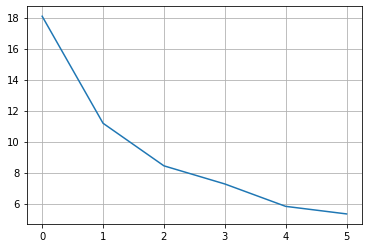

In [ ]:
plt.plot(results_ham.explained_variance_)#график каменистой осыпи
plt.grid()
plt.show()

Значит у фрейма "хам" есть около 6 главных компонент


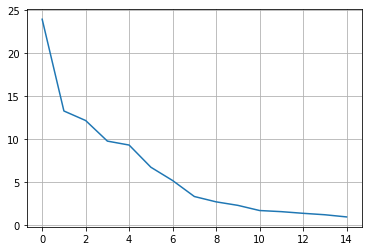

In [ ]:
plt.plot(results_spam.explained_variance_)#график каменистой осыпи
plt.grid()
plt.show()

In [ ]:
LV_spam=pd.DataFrame(results_spam.components_)
LV_ham=pd.DataFrame(results_ham.components_)
LV_spam.shape

(6, 100)

In [ ]:
kmeans_spam = KMeans(n_clusters = 5).fit(LV_spam)
labels_spam = kmeans_spam.labels_
print(silhouette_score(LV_spam, labels_spam, metric = 'euclidean'))

2.616820764472959e-17


In [ ]:
sil_ham = []
kmax = 5
for k in range(2, kmax+1):
   kmeans_ham = KMeans(n_clusters = k).fit(LV_ham)
   labels_ham = kmeans_ham.labels_
   sil_ham.append(silhouette_score(LV_ham, labels_ham, metric = 'euclidean'))
   print( silhouette_score(LV_ham, labels_ham, metric = 'euclidean'))
maxpos_ham = sil_ham.index(max(sil_ham))
n_clusters_ham = maxpos + 2
maxpos_ham

4.1869132231567344e-16
1.8317745351310725e-16
2.0934566115783685e-16
2.6168207644729615e-17


0

In [ ]:
kmeans_ham = KMeans(n_clusters = k).fit(LV_ham)

In [ ]:
LV_ham.T.shape

(100, 6)

In [ ]:
len(kmeans_ham.labels_)

6

In [ ]:
results_spam = model_spam.fit(X_spam_pd) 
results_ham = model_ham.fit(X_ham_pd) 
print(results_spam, results_ham)

In [ ]:
sil = []
kmax = 10
for k in range(2, kmax+1):
   kmeans_spam = KMeans(n_clusters = k).fit(X_spam)
   labels = kmeans_spam.labels_
   sil.append(silhouette_score(X_spam, labels, metric = 'euclidean'))
        
maxpos = sil.index(max(sil))
n_clusters = maxpos + 2